# Assignment 9
## Due June 27th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

## Exercise 1

(a) Calculating the projections $Wu$ and $Wv$, where $W \in \mathbb{R}^{d\times n}$ and $u,v \in \mathbb{R}^{n}$ is equivalent to calculating $d$ linear equations, one per row of $W$. Solving this system of equations for $u,v$ is then equivalent to solving a linear equation system with $d$ equations and $n$ unknowns, $d<n$. The system is, therefore, underdetermined, i.e., it will have multiple solutions and there exist $u,v \in  \mathbb{R}^n$ such that $Wu = Wv$.

(b) Since for each compressed vector $Wu \in  \mathbb{R}^d$, there is more than one original data vector $u \in  \mathbb{R}^n$ that could have generated it, it is not possible to recover the original, n-dimensional vector from the compressed vector.

# Exercise 2: PCA and Random Projections

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

In [3]:
# load the USPS dataset
usps_df = pd.read_csv('USPS.csv', sep='\t',)
xs_usps = usps_df.drop(['Label'], axis=1).values
ys_usps = usps_df['Label'].values

xs_usps.shape, ys_usps.shape

((1000, 256), (1000,))

#### Here you can implement PCA and Random Projections yourself. This will be awarded with 1.5 bonus points per method. If you decide to do so, you have to use your implementation in this exercise. If you do not want to implement this, simply remove the NotImplementedError().

In [43]:
# Your PCA and random projection implementation HERE (OPTIONAL)
def do_pca_projection(X, n_dim = None):
    eigvals, eigvecs = np.linalg.eig(np.cov(X.T))
    if n_dim:
        eigvecs = eigvecs[:,:n_dim]
    proj = X@eigvecs
    return proj

def do_random_projection(X,n_dim = None):
    if n_dim == None:
        n_dim = X.shape[1]
    
    projvecs = np.random.random((X.shape[1],n_dim))
    for vec in range(projvecs.shape[1]):#normalize each column of projvec
        projvecs[:,vec] /= np.linalg.norm(projvecs[:,vec])
    
    proj = X@projvecs
    return proj

### (a) Reduce the dataset's dimensionality to d=2

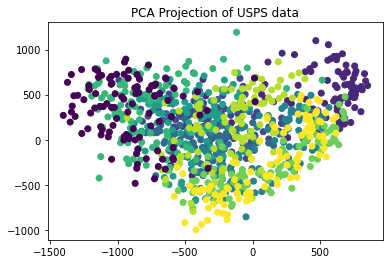

In [44]:
xs_usps_pca = do_pca_projection(xs_usps,2) # an np.array of shape 1000x2
xs_usps_pca2 = PCA(n_components=2).fit_transform(xs_usps)#
plt.scatter(*xs_usps_pca.T, c=ys_usps)
plt.title('PCA Projection of USPS data')
plt.show()

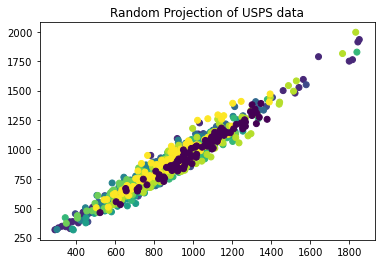

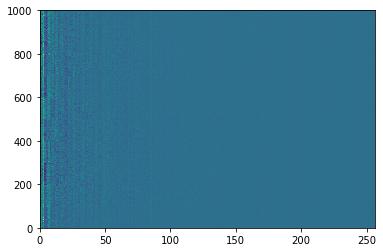

In [35]:
xs_usps_random = do_random_projection(xs_usps,2) # an np.array of shape 1000x2


plt.scatter(*xs_usps_random.T, c=ys_usps)
plt.title('Random Projection of USPS data')
plt.show()


### (b) Visualize prinicipal components and random directions

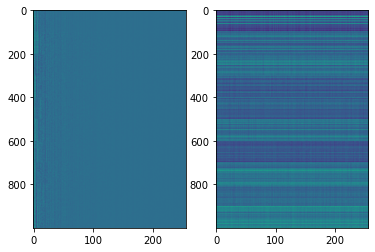

In [36]:
fig, axis = plt.subplots(1, 2)

axis[0].imshow(do_pca_projection(xs_usps), aspect="auto")

axis[1].imshow(do_random_projection(xs_usps), aspect="auto")

plt.show()

### (c) Visualize reconstructed images

In [37]:
def reconstruct(xs_original, xs_projected):
    ''' Returns: A np.array of the same shape as xs_original
    '''

    dim = xs_projected.shape[1]
    R = np.zeros((256, dim))
    for i in range(256):
        R[i,:] = np.linalg.lstsq(xs_projected, xs_original[:,i], rcond=None)[0] 
    return (R @ xs_projected.T).T

In [38]:
# assert correctness of reconstruct
np.random.seed(42)
W = np.random.normal(size=(256,2))/np.sqrt(2)
xs_reconstructed = reconstruct(xs_usps, xs_usps @ W)
assert_almost_equal(np.linalg.norm(xs_reconstructed), 28102.566390212647)

random_projection = GaussianRandomProjection(n_components=256)
xs_usps_random = random_projection.fit_transform(xs_usps)
assert (xs_usps - reconstruct(xs_usps, xs_usps_random)).max() < 1e-8

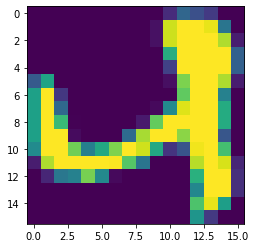

In [39]:
# we want to reconstruct digit number 100 - visualize it
digit = xs_usps[100,:]
plt.imshow(digit.reshape(16, 16))
plt.show()

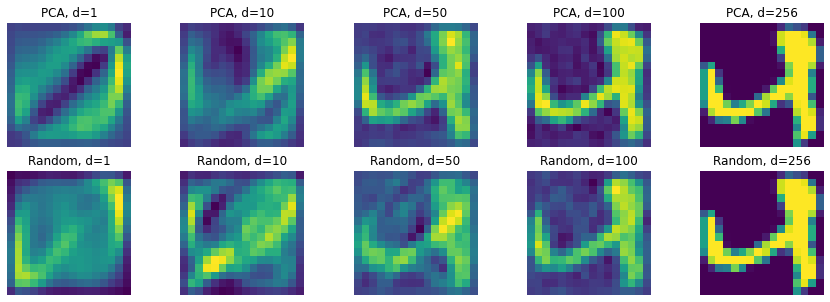

In [45]:
dimensions = [1, 10, 50, 100, 256]
fig, axis = plt.subplots(2, 5, figsize=(15,5))

for idx, dim in enumerate(dimensions):
    pcaproj = do_pca_projection(xs_usps,dim)
    reconstructed_pca = reconstruct(xs_usps,pcaproj)[100,:]
    randomproj = do_random_projection(xs_usps,dim)
    reconstructed_random = reconstruct(xs_usps,randomproj)[100,:]

    axis[0, idx].imshow(reconstructed_pca.reshape(16,16))
    axis[1, idx].imshow(reconstructed_random.reshape(16,16))
    # axis[0, idx].imshow( pca reconstruction of image 100 for the given dimension )
    # axis[1, idx].imshow( random projection reconstruction of image 100 for the given dimension )
    axis[0, idx].set_title(f'PCA, d={dim}')
    axis[0, idx].axis('off')
    axis[1, idx].set_title(f'Random, d={dim}')
    axis[1, idx].axis('off')

plt.show()

### (d) Reconstruction Error of PCA and Random Projections

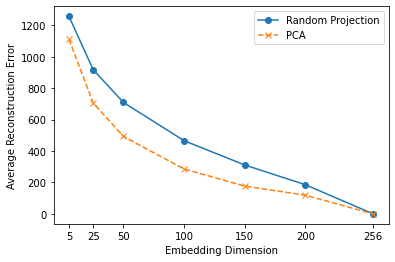

In [52]:
dimensions = [5, 25, 50, 100, 150, 200, 256]

errors_pca = [np.mean(np.sqrt(np.sum((xs_usps - reconstruct(xs_usps,do_pca_projection(xs_usps,dim)))**2, 1))) for dim in dimensions]
errors_random = [np.mean(np.sqrt(np.sum((xs_usps - reconstruct(xs_usps,do_random_projection(xs_usps,dim)))**2, 1))) for dim in dimensions]

# YOUR CODE HERE

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

### (e) Average and maximum distortion of distances

In [72]:
def pairwise_distortions(xs_orig, xs_new):
    n = xs_orig.shape[0]
    distmat = np.zeros((n,n), dtype=np.float64)
    for i in range(n):
        for k in range(n):
            if i == k:
                distmat[i,k] = 1
            else:
                dxy = np.sqrt(np.sum((xs_orig[i,:]-xs_orig[k,:])**2))
                dxy_tilde = np.sqrt(np.sum((xs_new[i,:]-xs_new[k,:])**2))
                distmat[i,k] = np.max((dxy/dxy_tilde, dxy_tilde/dxy))

    return distmat

def average_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).mean()
    
def maximum_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).max()



In [73]:
xs_orig = np.arange(10).reshape(-1, 1)
xs_new = xs_orig * xs_orig

# checking correctness of distortion functions
assert_almost_equal(average_distortion(xs_orig, xs_orig), 1.)
assert_almost_equal(maximum_distortion(xs_new, xs_new), 1.)
assert_almost_equal(average_distortion(xs_orig, xs_new), 9.)
assert_almost_equal(maximum_distortion(xs_orig, xs_new), 17.)
p_usps = pairwise_distortions(xs_usps, PCA(2).fit_transform(xs_usps))
assert_equal(p_usps.shape, (499500, ))

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 8.2
 DESIRED: 9.0

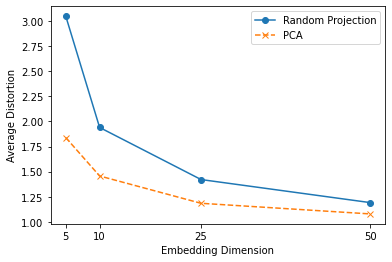

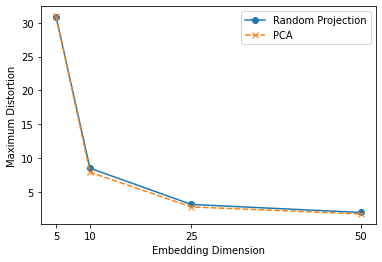

In [74]:
dimensions = [5, 10, 25,  50]

avg_distortion_pca = [average_distortion(xs_usps,reconstruct(xs_usps,do_pca_projection(xs_usps,dim))) for dim in dimensions]
avg_distortion_random = [average_distortion(xs_usps,reconstruct(xs_usps,do_random_projection(xs_usps,dim))) for dim in dimensions]

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = [maximum_distortion(xs_usps,reconstruct(xs_usps,do_pca_projection(xs_usps,dim))) for dim in dimensions]
max_distortion_random = [maximum_distortion(xs_usps,reconstruct(xs_usps,do_random_projection(xs_usps,dim))) for dim in dimensions]

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()


### (f) Multiply the first dimension of the data by 500 and repeat (d) and (e).

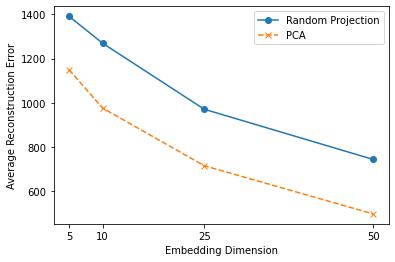

In [75]:

xs_usps[:,0] *= 500
errors_pca = [np.mean(np.sqrt(np.sum((xs_usps - reconstruct(xs_usps,do_pca_projection(xs_usps,dim)))**2, 1))) for dim in dimensions]
errors_random = [np.mean(np.sqrt(np.sum((xs_usps - reconstruct(xs_usps,do_random_projection(xs_usps,dim)))**2, 1))) for dim in dimensions]


plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

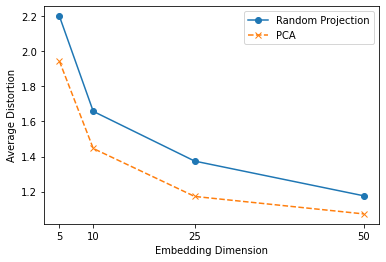

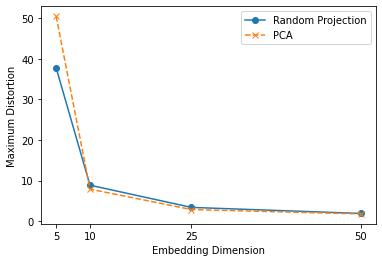

In [76]:
dimensions = [5, 10, 25,  50]

avg_distortion_pca = [average_distortion(xs_usps,reconstruct(xs_usps,do_pca_projection(xs_usps,dim))) for dim in dimensions]
avg_distortion_random = [average_distortion(xs_usps,reconstruct(xs_usps,do_random_projection(xs_usps,dim))) for dim in dimensions]

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = [maximum_distortion(xs_usps,reconstruct(xs_usps,do_pca_projection(xs_usps,dim))) for dim in dimensions]
max_distortion_random = [maximum_distortion(xs_usps,reconstruct(xs_usps,do_random_projection(xs_usps,dim))) for dim in dimensions]

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()



#With the first dimension multiplied by 500, the advantage of PCA becomes more apparent, 
# since there is one component in the data that dominates/explains a larger portion of the variance.

### (g) Summarize the advantages and disadvantages of PCA and Random Projections

PCA projects in a systematic way, i.e., it prefers projections that explain more variance. Random projections capture all aspects of the original data, i.e., they can be a better overall representation of the data as they do not only focus on high-variance components

# Exercise 3: Kernel PCA

In [77]:
from sklearn.gaussian_process.kernels import RBF

def get_circle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [78]:
data = np.concatenate([get_circle_data(100, 2),
                       get_circle_data(100, 4),
                       get_circle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

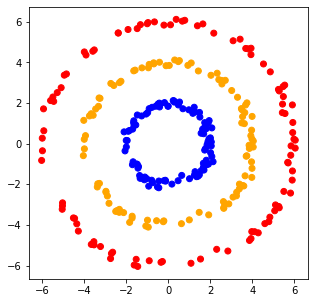

In [79]:
fig = plt.figure()
fig.set_size_inches((5,5))
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

## a)

In [91]:
def kernel_PCA(xs, kernel, l=2):
    
   K = kernel(xs,xs)
   n = K.shape[0]
   ones_n = 1/n * np.ones((n,n))
   K_tilde = K - ones_n@K - K@ones_n + ones_n@K@ones_n
   eigenvalues, eigenvectors = np.linalg.eig(K_tilde)
   eigenvalues, eigenvectors = np.real(eigenvalues), np.real(eigenvectors)
   for cix in range(eigenvectors.shape[1]):
      eigenvectors[:,cix] /= np.sqrt(np.abs(eigenvalues[cix]))
   V_l = eigenvectors[:,:l]

   proj = K_tilde@V_l

   return proj


   

## b)

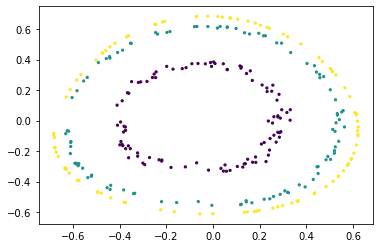

In [97]:
# apply kernel PCA and 2d plot

proj = kernel_PCA(data,RBF(5),l=3)

plt.figure()
plt.scatter(proj[:,0],proj[:,1],s=5, c=labels)

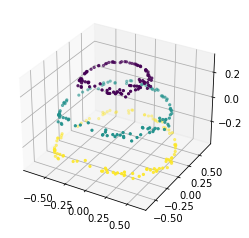

In [99]:
# 3d plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(proj[:,0],proj[:,1],proj[:,2],s=5, c=labels)